In [1]:
import os
import pandas as pd
import numpy as np

import pylab as plt
import sklearn
import statistics
import scipy.stats
import matplotlib
import sklearn, sklearn.preprocessing, sklearn.decomposition
import matplotlib.patches as mpatches
import seaborn as sns

sizes_dict = {
    0.12: 100,
    0.08: 150,
    1.11: 300,
    3.33: 550,
    10.00: 750,
}

In [2]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"

data_year = "2020"
cell_name = "BC3C"

data_dir = os.path.join(wkdir,"00_outputs_" + data_year + "_" + cell_name)


## Norm data

In [3]:
# level_3 used
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
data_norm = pd.read_excel(data_file, index_col = 0)
display(data_norm)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.543203,0.494266,-0.011923,-0.225931,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,-0.565096,-0.088634,0.122977,-0.047931,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,0.226104,-0.228034,-0.121023,-0.075331,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.608596,-0.228835,0.072777,0.082970,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.318397,0.122265,-0.134323,-0.088931,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,-1.598475,-0.552750,0.515151,0.120800,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-1.650575,0.203600,-0.003250,-0.064800,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.127625,0.031600,0.103250,-0.249600,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.054676,-0.596050,0.084600,0.444700,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700


## Sig info

In [4]:
data_file = os.path.join(data_dir, "sig_info_" + data_year + "_" + cell_name+ ".xlsx")
sig_info_cell_df = pd.read_excel(data_file, index_col = 0).fillna("")
display(sig_info_cell_df)

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_BC3C_24H:A03,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A03,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A04,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A04,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A05,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A05,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A06,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A06,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:J13,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:J13,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P20,1,trt_cp,BAY-61-3606,,0,3.33 uM,3.33
MOAR012_BC3C_24H:P21,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P21,1,trt_cp,BAY-61-3606,,0,1.11 uM,1.11
MOAR012_BC3C_24H:P22,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P22,1,trt_cp,ethaverine,,0,10 uM,10.00


In [5]:
#Full info
data_norm_info_df = pd.concat([data_norm,
                               sig_info_cell_df.loc[data_norm.index,['pert_drug','targets','dose','dose_float']]],
                               axis=1)                            

In [6]:
data_norm_info_df

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10,pert_drug,targets,dose,dose_float
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204,DMSO,DMSO_No_target,0 uM,0.00
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646,DMSO,DMSO_No_target,0 uM,0.00
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896,DMSO,DMSO_No_target,0 uM,0.00
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704,DMSO,DMSO_No_target,0 uM,0.00
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904,DMSO,DMSO_No_target,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500,BAY-61-3606,,3.33 uM,3.33
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700,BAY-61-3606,,1.11 uM,1.11
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300,ethaverine,,10 uM,10.00
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700,ethaverine,,3.33 uM,3.33


### CDK

In [51]:
#ESR, EGFR, TOP2A, MDM2,EGFR,CDK
target_name = "SRC"

target = "SRC"
drugs = list(set(data_norm_info_df.loc[data_norm_info_df.targets.str.contains(target)].pert_drug))

#target = "MTOR"
#drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target SRC: 1 ['dasatinib']


In [58]:
to_pca_df=data_norm_info_df.loc[data_norm_info_df.targets.str.contains('SRC')]

In [59]:
to_pca_df

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10,pert_drug,targets,dose,dose_float
ASG002_BC3C_24H:I07,1.550446,-0.412196,-0.025804,0.147235,-0.130919,0.462377,-0.003796,0.207281,-0.192119,1.852208,...,0.131254,-0.002946,-0.365519,-0.031673,0.032823,-0.354396,dasatinib,"ABL1, BCR, EPHA2, FYN, KIT, LCK, LYN, PDGFRB, ...",10 uM,10.00
ASG002_BC3C_24H:I08,0.138246,-0.185996,-0.025654,0.214134,0.086381,0.196076,-0.210296,-1.347619,0.565881,0.592707,...,-0.055996,1.544854,-0.112619,-0.279373,-0.014677,0.410604,dasatinib,"ABL1, BCR, EPHA2, FYN, KIT, LCK, LYN, PDGFRB, ...",1.11 uM,1.11
ASG002_BC3C_24H:I09,0.013946,0.064754,0.164146,0.672535,-0.654619,-0.182323,-0.428196,-0.140769,-0.525269,0.460608,...,-0.151846,0.367054,0.044281,-0.165373,-0.225977,-0.568746,dasatinib,"ABL1, BCR, EPHA2, FYN, KIT, LCK, LYN, PDGFRB, ...",0.12 uM,0.12


In [60]:
#remove alvocidib in EGFR
#to_pca_df=to_pca_df.iloc[3:,]

In [61]:
to_pca=to_pca_df.drop(columns=['pert_drug','targets','dose','dose_float'])

In [62]:
to_pca

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:I07,1.550446,-0.412196,-0.025804,0.147235,-0.130919,0.462377,-0.003796,0.207281,-0.192119,1.852208,...,0.378404,0.041465,0.200277,-0.543430,0.131254,-0.002946,-0.365519,-0.031673,0.032823,-0.354396
ASG002_BC3C_24H:I08,0.138246,-0.185996,-0.025654,0.214134,0.086381,0.196076,-0.210296,-1.347619,0.565881,0.592707,...,0.531903,-0.212134,-0.361323,0.101469,-0.055996,1.544854,-0.112619,-0.279373,-0.014677,0.410604
ASG002_BC3C_24H:I09,0.013946,0.064754,0.164146,0.672535,-0.654619,-0.182323,-0.428196,-0.140769,-0.525269,0.460608,...,-0.643696,-0.094735,0.219577,-0.043231,-0.151846,0.367054,0.044281,-0.165373,-0.225977,-0.568746


In [63]:
#scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(to_pca.values)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(to_pca.values)
explained = model.explained_variance_ratio_
print(explained)

[0.62067018 0.37932982]


In [64]:
#No order changed
result_pca = pd.DataFrame(new,index=to_pca_df.index,columns=['PCA1','PCA2'])
result_pca['pert_drug']=to_pca_df['pert_drug']
result_pca['dose_float']=to_pca_df['dose_float']
result_pca['targets']=to_pca_df['targets']


Text(0.5, 1.0, 'PCA Embedding of Gene Expression Z-Scores in SRC-Targeted BC3C Cells')

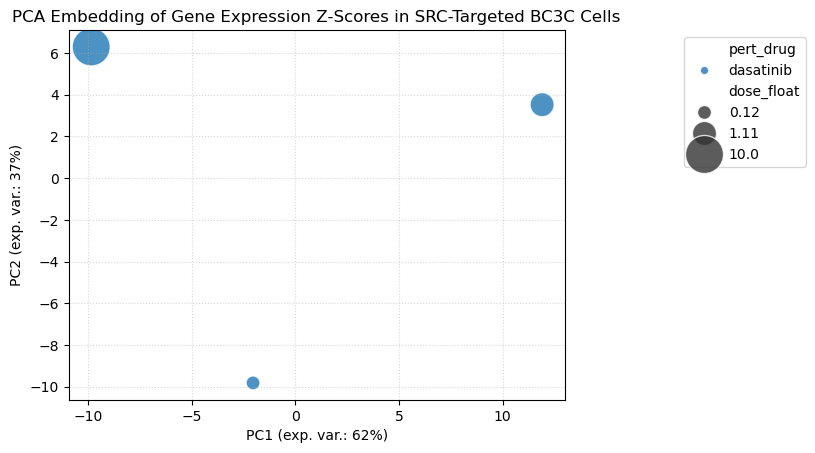

In [65]:

sns.scatterplot(x='PCA1',y='PCA2',hue='pert_drug',size='dose_float',alpha=0.8,sizes=sizes_dict,data=result_pca)
plt.legend(bbox_to_anchor=[1.5,1])

plt.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
plt.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
plt.grid(alpha=0.5, ls=':')
plt.title(f'PCA Embedding of Gene Expression Z-Scores in {target_name}-Targeted {cell_name} Cells')



In [ ]:
result_pca

,PCA1,PCA2,pert_drug,dose_float,targets
ASG002_BC3C_24H:E22,4.866315,-2.631482,roscovitine,10.00,"CDK2, CDK7, CDK9"
ASG002_BC3C_24H:E23,4.921371,-5.967479,roscovitine,1.11,"CDK2, CDK7, CDK9"
ASG002_BC3C_24H:E24,6.125748,-3.663510,roscovitine,0.12,"CDK2, CDK7, CDK9"
ASG002_BC3C_24H:F04,-43.983970,-5.225311,alvocidib,10.00,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9..."
ASG002_BC3C_24H:F05,7.511201,-4.264927,alvocidib,1.11,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9..."
ASG002_BC3C_24H:F06,3.920126,-5.262848,alvocidib,0.12,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9..."
ASG002_BC3C_24H:L01,4.670675,10.088502,PHA-793887,10.00,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9"
ASG002_BC3C_24H:L02,-1.602608,4.278340,PHA-793887,1.11,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9"
ASG002_BC3C_24H:L03,1.286883,-1.245260,PHA-793887,0.12,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9"
ASG002_BC3C_24H:N13,-1.099945,6.005508,JNJ-7706621,10.00,"AURKA, AURKB, CDK1, CDK2"


### Androgen

In [ ]:
target_name = "Androgen"

target = "AR"
drugs = list(set(data_norm_info_df.loc[data_norm_info_df.targets.str.contains(target)].pert_drug))

#target = "MTOR"
#drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

In [ ]:
#Androgen drugs
drugs=['flufenamic-acid', 'nandrolone','oxandrolone','testosterone-enanthate', 'testosterone-propionate']
sig_ids_selected = []

for drug in drugs:
    # Get the indices of rows where 'pert_drug' is equal to the current drug
    indices = data_norm_info_df[data_norm_info_df['pert_drug'] == drug].index
    
    # Extend the list with these indices
    sig_ids_selected.extend(indices)

print(sig_ids_selected)

In [ ]:
to_pca_df=data_norm_info_df.loc[sig_ids_selected]

### PI3K MTOR

In [ ]:
selected= pd.concat([data_norm_info_df.loc[data_norm_info_df.targets.str.contains('PIK3')][['pert_drug','targets','dose_float']],
                      data_norm_info_df.loc[data_norm_info_df.targets.str.contains('MTOR')][['pert_drug','targets','dose_float']]],axis=0)
selected=selected.drop_duplicates()
selected.drop_duplicates().index
to_pca_df=data_norm_info_df.loc[selected.drop_duplicates().index]


In [ ]:
to_pca_df

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10,pert_drug,targets,dose,dose_float
ASG002_BC3C_24H:A10,-0.496854,-0.658596,-0.080204,0.202535,-0.520919,-0.251723,-0.116796,0.841981,-0.128470,0.221207,...,-0.300896,1.796254,-0.244519,0.097627,0.608573,-0.757496,taselisib,PIK3CA,10 uM,10.00
ASG002_BC3C_24H:A11,0.288446,-0.142196,0.231996,0.602335,-0.192819,-0.017523,-0.354496,0.593681,-0.757269,0.254258,...,0.216204,1.773154,0.116732,0.061027,0.106123,-0.723196,taselisib,PIK3CA,1.11 uM,1.11
ASG002_BC3C_24H:A19,0.189747,-0.075397,-0.329354,0.403335,0.001032,-0.202623,-0.011196,0.195781,0.249680,0.487708,...,0.030104,0.668354,0.058081,-0.337573,-0.014126,-1.121396,AS-605240,PIK3CG,10 uM,10.00
ASG002_BC3C_24H:A20,-0.016454,-0.383796,-0.225204,0.313134,-0.096419,-0.023724,0.237854,0.020381,0.197781,0.627008,...,-0.071446,0.825354,-0.178169,0.098427,-0.003677,-1.139496,AS-605240,PIK3CG,1.11 uM,1.11
ASG002_BC3C_24H:A21,0.080746,-0.199996,0.278446,-0.083265,0.210881,-0.178423,0.161504,0.004481,-0.124219,0.505308,...,0.210104,0.350654,-0.080619,-0.338173,-0.123477,0.077104,AS-605240,PIK3CG,0.12 uM,0.12
ASG002_BC3C_24H:C16,0.346846,-0.517996,-0.078704,0.134234,0.095981,-0.167423,-0.641696,0.499680,-0.709969,-0.610692,...,0.455854,0.494454,0.181881,0.069327,-0.018077,0.028704,NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG",10 uM,10.00
ASG002_BC3C_24H:C17,-0.497954,-0.210946,0.034796,0.228234,0.309181,-0.397073,-0.219747,-0.263819,0.699531,-0.522692,...,-0.036846,-0.843546,0.016681,0.235127,-0.230377,0.296304,NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG",1.11 uM,1.11
ASG002_BC3C_24H:C18,0.093946,-0.188195,-0.090404,0.346535,-0.066019,-0.229123,-0.232396,0.370881,-0.681219,0.342707,...,-0.391046,-0.060946,-0.328919,-0.223473,0.335123,0.422004,NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG",0.12 uM,0.12
ASG002_BC3C_24H:F01,-0.371054,-0.219796,0.194846,-0.033465,-0.078619,-0.258423,-0.299846,0.320230,-0.684620,0.915608,...,0.065004,0.696804,-0.095419,-0.266373,0.479523,-0.349796,LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC",10 uM,10.00
ASG002_BC3C_24H:F02,-0.137354,-0.265096,-0.327404,0.075834,-1.136019,-0.389523,-0.163846,0.008632,0.233981,0.276008,...,0.310804,0.340154,-0.077020,-0.157573,-0.206377,-1.124646,LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC",1.11 uM,1.11


In [ ]:
to_pca=to_pca_df.drop(columns=['pert_drug','targets','dose','dose_float'])

In [ ]:
to_pca

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A10,-0.496854,-0.658596,-0.080204,0.202535,-0.520919,-0.251723,-0.116796,0.841981,-0.128470,0.221207,...,0.711504,0.003565,-1.809123,-0.620731,-0.300896,1.796254,-0.244519,0.097627,0.608573,-0.757496
ASG002_BC3C_24H:A11,0.288446,-0.142196,0.231996,0.602335,-0.192819,-0.017523,-0.354496,0.593681,-0.757269,0.254258,...,0.663604,1.126865,-0.124024,-0.553031,0.216204,1.773154,0.116732,0.061027,0.106123,-0.723196
ASG002_BC3C_24H:A19,0.189747,-0.075397,-0.329354,0.403335,0.001032,-0.202623,-0.011196,0.195781,0.249680,0.487708,...,-0.564396,-0.205234,0.052377,-0.095931,0.030104,0.668354,0.058081,-0.337573,-0.014126,-1.121396
ASG002_BC3C_24H:A20,-0.016454,-0.383796,-0.225204,0.313134,-0.096419,-0.023724,0.237854,0.020381,0.197781,0.627008,...,-0.251896,-0.056734,-0.307723,0.054569,-0.071446,0.825354,-0.178169,0.098427,-0.003677,-1.139496
ASG002_BC3C_24H:A21,0.080746,-0.199996,0.278446,-0.083265,0.210881,-0.178423,0.161504,0.004481,-0.124219,0.505308,...,0.371203,0.100066,0.215977,0.105869,0.210104,0.350654,-0.080619,-0.338173,-0.123477,0.077104
ASG002_BC3C_24H:C16,0.346846,-0.517996,-0.078704,0.134234,0.095981,-0.167423,-0.641696,0.499680,-0.709969,-0.610692,...,-0.035196,0.209065,-0.006523,-1.385430,0.455854,0.494454,0.181881,0.069327,-0.018077,0.028704
ASG002_BC3C_24H:C17,-0.497954,-0.210946,0.034796,0.228234,0.309181,-0.397073,-0.219747,-0.263819,0.699531,-0.522692,...,0.573403,0.035465,-0.085424,-0.659531,-0.036846,-0.843546,0.016681,0.235127,-0.230377,0.296304
ASG002_BC3C_24H:C18,0.093946,-0.188195,-0.090404,0.346535,-0.066019,-0.229123,-0.232396,0.370881,-0.681219,0.342707,...,0.365804,-0.581834,-0.116473,-0.115331,-0.391046,-0.060946,-0.328919,-0.223473,0.335123,0.422004
ASG002_BC3C_24H:F01,-0.371054,-0.219796,0.194846,-0.033465,-0.078619,-0.258423,-0.299846,0.320230,-0.684620,0.915608,...,0.748903,-0.062634,-0.014423,-0.373831,0.065004,0.696804,-0.095419,-0.266373,0.479523,-0.349796
ASG002_BC3C_24H:F02,-0.137354,-0.265096,-0.327404,0.075834,-1.136019,-0.389523,-0.163846,0.008632,0.233981,0.276008,...,-0.728996,-0.250834,0.247177,-0.177431,0.310804,0.340154,-0.077020,-0.157573,-0.206377,-1.124646


In [ ]:
#scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(to_pca.values)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(to_pca.values)
explained = model.explained_variance_ratio_
print(explained)

[0.30399312 0.14725269]


In [ ]:
result_pca = pd.DataFrame(new,index=to_pca_df.index,columns=['PCA1','PCA2'])

In [ ]:
result_pca = pd.DataFrame(new,index=to_pca_df.index,columns=['PCA1','PCA2'])
result_pca['pert_drug']=to_pca_df['pert_drug']
result_pca['dose_float']=to_pca_df['dose_float']
result_pca['targets']=to_pca_df['targets']


In [ ]:
result_pca

,PCA1,PCA2,pert_drug,dose_float,targets
ASG002_BC3C_24H:A10,11.104908,1.264785,taselisib,10.00,PIK3CA
ASG002_BC3C_24H:A11,7.668751,0.531044,taselisib,1.11,PIK3CA
ASG002_BC3C_24H:A19,-4.144834,-4.949428,AS-605240,10.00,PIK3CG
ASG002_BC3C_24H:A20,-2.630318,-5.944368,AS-605240,1.11,PIK3CG
ASG002_BC3C_24H:A21,-6.053525,-4.687662,AS-605240,0.12,PIK3CG
ASG002_BC3C_24H:C16,10.454990,6.203718,NVP-BEZ235,10.00,"MTOR, PIK3CA, PIK3CD, PIK3CG"
ASG002_BC3C_24H:C17,0.169910,3.253207,NVP-BEZ235,1.11,"MTOR, PIK3CA, PIK3CD, PIK3CG"
ASG002_BC3C_24H:C18,-3.248961,-3.923091,NVP-BEZ235,0.12,"MTOR, PIK3CA, PIK3CD, PIK3CG"
ASG002_BC3C_24H:F01,0.625815,-4.206111,LY-294002,10.00,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC"
ASG002_BC3C_24H:F02,-3.719072,-5.628271,LY-294002,1.11,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC"


Text(0.5, 1.0, 'PCA Embedding of Gene Expression Z-Scores in PI3K-Targeted BC3C Cells')

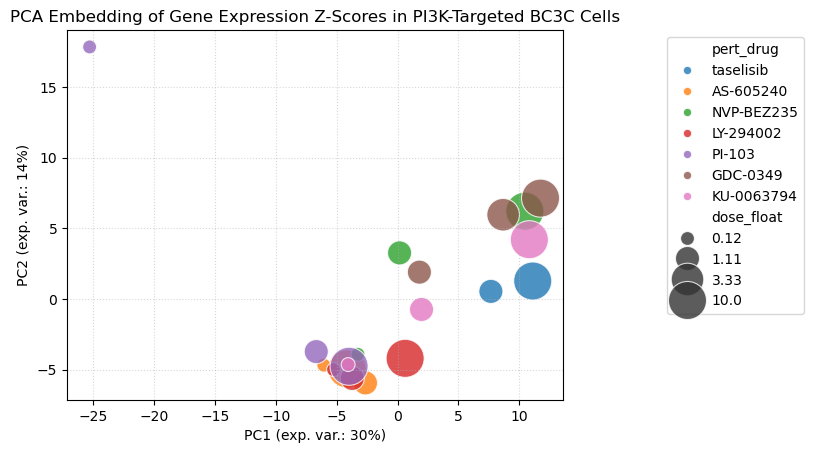

In [ ]:

sns.scatterplot(x='PCA1',y='PCA2',hue='pert_drug',size='dose_float',alpha=0.8,sizes=sizes_dict,data=result_pca)
plt.legend(bbox_to_anchor=[1.5,1])

plt.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
plt.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
plt.grid(alpha=0.5, ls=':')
plt.title(f'PCA Embedding of Gene Expression Z-Scores in PI3K-Targeted {cell_name} Cells')

